In [195]:
import glob
import re
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
klifs_data = pd.read_csv('/home/paula/Masterarbeit/data/KLIFS_download/KLIFS_export.csv')

In [197]:
# get pdb for all kinase inhibitors called *nib
nibs = klifs_data[klifs_data['LIGAND'].str.contains('nib',flags=re.IGNORECASE)] \
            [['LIGAND', 'PDB']] \
            .sort_values(by='LIGAND') \
            .drop_duplicates()
nibs.shape

(17, 2)

In [198]:
nibs = nibs.set_index('PDB')

In [199]:
# all *nib inhibitors
nibs.LIGAND.unique()

array(['AXITINIB', 'Baricitinib', 'Dabrafenib', 'Entrectinib',
       'Gefitinib', 'Lestaurtinib', 'volitinib'], dtype=object)

In [200]:
path_to_library = '/home/paula/Masterarbeit/FragmentLibrary/'

# list of folders for each subpocket
subpockets = ['AP', 'FP', 'SE', 'GA', 'B1', 'B2', 'X']
folders = [path_to_library+subpocket for subpocket in subpockets]

In [201]:
# read fragment library

data = pd.DataFrame()

# iterate over subpockets
for i, folder in enumerate(folders):
    
    subpocket = subpockets[i]
    
    file = folder+'/'+subpocket+'.sdf' 
    df = pd.DataFrame()
    suppl = Chem.SDMolSupplier(file, removeHs=False)

    pdbs = []
    smiles = []
    
    # iterate over fragments in this subpocket
    for frag in suppl:
        
        smiles.append(Chem.MolToSmiles(frag))
        pdbs.append(frag.GetProp('complex_pdb'))
     
    df['smiles'] = smiles
    df['PDB'] = pdbs
    df['subpocket'] = subpocket
    
    data = data.append(df)
    
# combine all subpockets
data = data.reset_index(drop=True)
data.shape

(7486, 3)

In [202]:
# get only those fragments with a PDB from the *nib inhibitors
nib_frags = data[data.PDB.isin(nibs.index)]
nib_frags.head()

,smiles,PDB,subpocket
5,[15*]Sc1c([H])c([H])c2c(C(=[34*])[H])nn([H])c2...,4twp,AP
57,[44*]C(=O)/N=C1/N=Nc2c([H])c([H])c([60*])c([H]...,5fto,AP
166,[34*]c1nc([H])nc2c1c([H])c([H])n2[H],4w9x,AP
201,[11*]c1nc(N([H])[H])nc([H])c1[H],4xv2,AP
206,[11*]c1nc(N([H])[H])nc([H])c1[H],5csw,AP


In [203]:
# add LIGAND column to the fragment table
nib_frags = nib_frags.join(nibs, on='PDB') \
            .sort_values(by=['LIGAND', 'subpocket'])

In [204]:
# all *nib inhibitors present in the fragment library
nib_frags.LIGAND.unique()

array(['AXITINIB', 'Baricitinib', 'Dabrafenib', 'Entrectinib',
       'Gefitinib', 'volitinib'], dtype=object)

In [205]:
# show images in notebook
from IPython.core.display import HTML
def show(df):
    return HTML(df.to_html(notebook=True))

In [206]:
PandasTools.AddMoleculeColumnToFrame(nib_frags, 'smiles')

,PDB,subpocket,LIGAND,ROMol
5,4twp,AP,AXITINIB,
2564,4twp,FP,AXITINIB,
4432,4twp,SE,AXITINIB,
166,4w9x,AP,Baricitinib,
2703,4w9x,FP,Baricitinib,
201,4xv2,AP,Dabrafenib,
206,5csw,AP,Dabrafenib,
209,5hie,AP,Dabrafenib,
7034,4xv2,B1,Dabrafenib,
7038,5csw,B1,Dabrafenib,

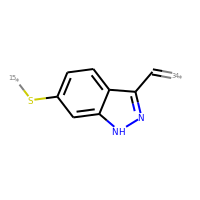
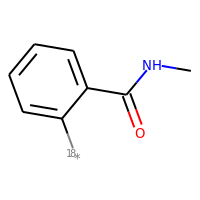
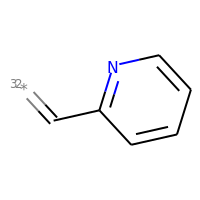
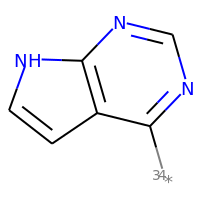
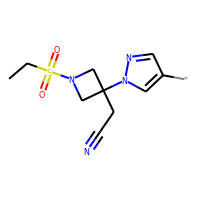
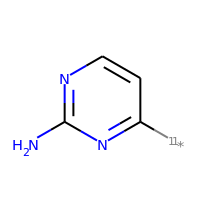
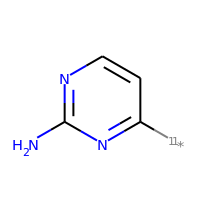
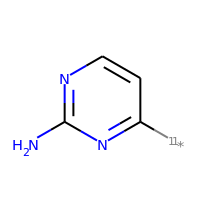
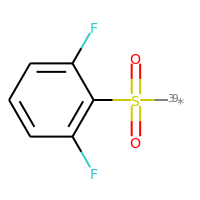
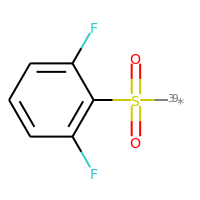
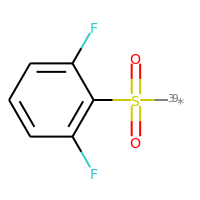
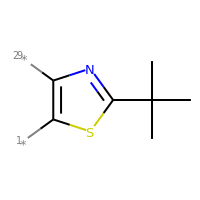
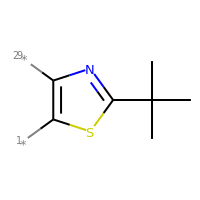
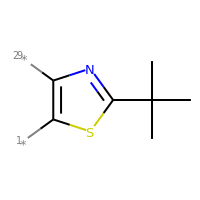
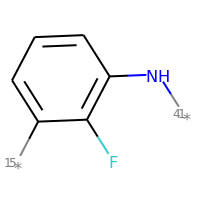
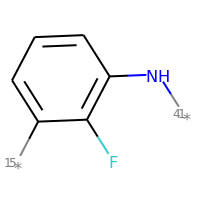
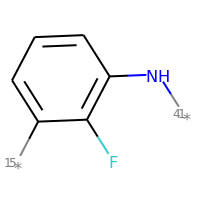
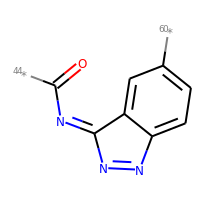
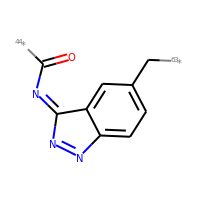
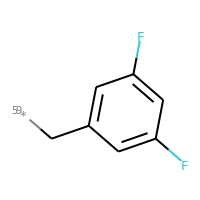
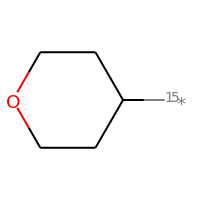
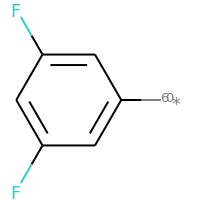
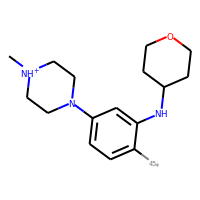
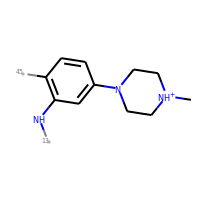
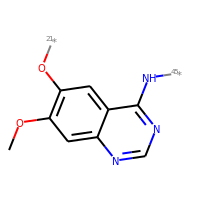
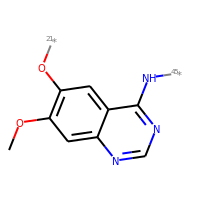
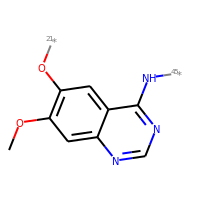
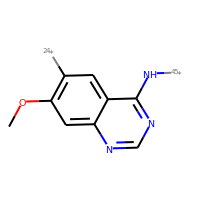
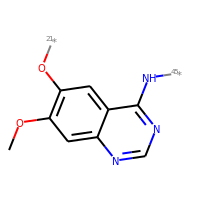
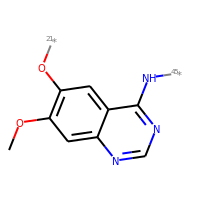
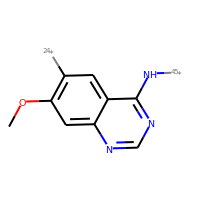
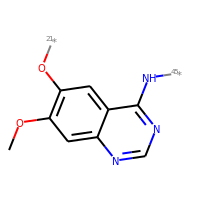
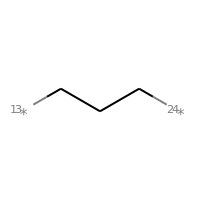
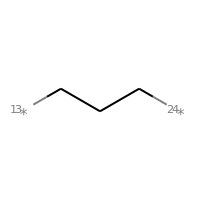
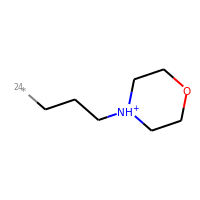
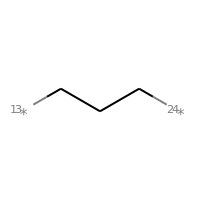
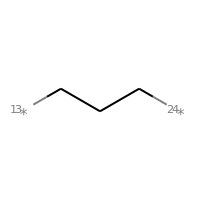
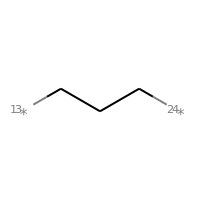
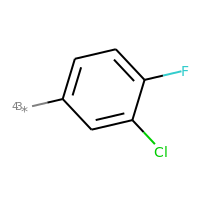
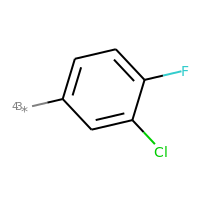
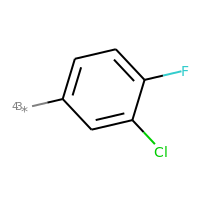
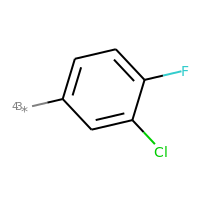
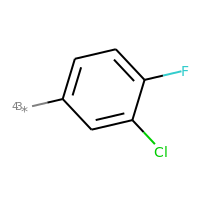
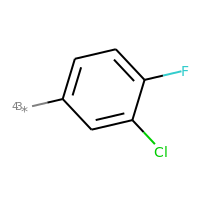
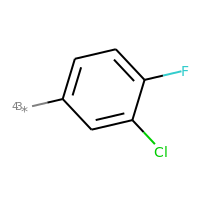
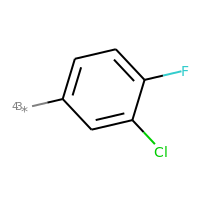
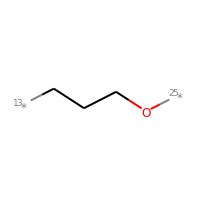
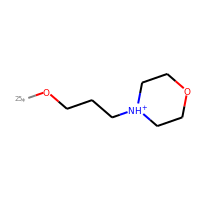
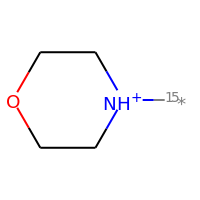
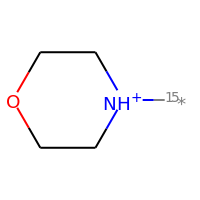
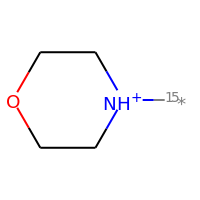
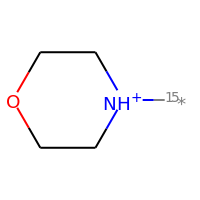
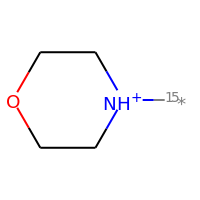
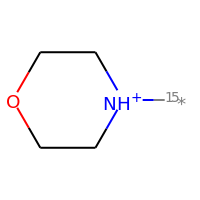
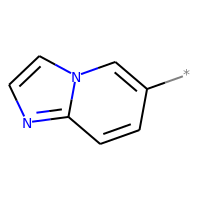
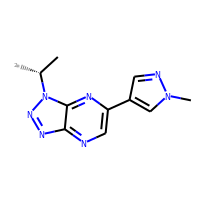

In [207]:
# show fragments of all *nib inhibitors, sorted by subpocket
show(nib_frags.drop(columns=['smiles']))